# Práctica Final: Partidos de fútbol en Argentina

Autor: Diego Viñals Lage

### En esta práctica final, analizaremos los datos de partidos de fútbol en Argentina para obtener insights y conclusiones relevantes. El objetivo es explorar diferentes aspectos relacionados con los equipos locales, los equipos visitantes, los resultados de los partidos y otras variables relevantes.

### Nos centraremos en analizar la relación entre la posesión del balón y el resultado final del partido. Utilizaremos técnicas de visualización para poder encontrar una relacion.

### Además, exploraremos las apuestas realizadas en relación con los partidos. Examinaremos las diferentes opciones de apuestas, como la victoria del equipo local, la victoria del equipo visitante y el empate, y evaluaremos su precisión en relación con los resultados reales de los partidos. Calcularemos un porcentaje de acierto para determinar si las casas de apuestas son confiables o si existen oportunidades para los apostadores.

### También examinaremos la cantidad de tiros a puerta realizados por los equipos y evaluaremos su impacto en los resultados de los partidos. Utilizaremos gráficos de cajas para comparar los tiros a puerta de los equipos visitantes y visitantes en función de los diferentes resultados del partido, como victoria, empate o derrota. Esto nos permitirá determinar si existe una relación significativa entre los tiros a puerta y el resultado final del partido.


 

## Hipótesis Principal: La hipótesis propuesta es si existe una relación entre el porcentaje de posesión de balón en un partido de fútbol y las posibilidades de ganar dicho partido.
#### Me centraré solo en los partidos que sucedieron en el año 2022

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


df = pd.read_csv('./afa_2015_2022_spa.csv')
# quitamos nan y posibles duplicados
df = df.dropna()
df = df.drop_duplicates()
df.head(20)

,torneo,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,...,proporcion_zurdos_local,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate
1279,Campeonato 2017/18,10,14,Godoy Cruz,Lanus,4,1,41.0,7.0,15.0,...,0.305556,51.100,1.806122,26.081633,0.265306,L,2018-02-07 21:30:00,1.87,4.43,3.24
1293,Campeonato 2017/18,11,14,Independiente,Rosario Central,1,1,61.0,10.0,25.0,...,0.180000,33.525,1.790227,25.177778,0.311111,E,2018-01-24 21:10:00,1.98,4.08,3.14
1308,Campeonato 2017/18,13,1,Godoy Cruz,Chacarita,1,0,46.0,2.0,9.0,...,0.305556,7.950,1.769412,24.368421,0.210526,L,2018-01-26 19:00:00,1.76,4.88,3.42
1309,Campeonato 2017/18,13,2,Tigre,Banfield,1,2,65.0,3.0,15.0,...,0.309524,21.225,1.793750,24.375000,0.175000,V,2018-01-26 19:00:00,2.36,3.18,3.08
1310,Campeonato 2017/18,13,3,Talleres (C),San Lorenzo,2,0,54.0,5.0,11.0,...,0.292683,49.825,1.783778,25.888889,0.288889,L,2018-01-26 21:15:00,2.16,3.58,3.06
1311,Campeonato 2017/18,13,4,Lanus,Patronato,1,1,64.0,3.0,4.0,...,0.265306,11.775,1.793953,27.674419,0.139535,E,2018-01-27 19:15:00,1.74,5.13,3.36
1312,Campeonato 2017/18,13,5,Newells,Arsenal,2,1,57.0,7.0,18.0,...,0.139535,9.050,1.775556,24.146341,0.341463,L,2018-01-27 17:00:00,1.82,4.54,3.33
1313,Campeonato 2017/18,13,6,Def y Justicia,Velez,0,1,57.0,7.0,15.0,...,0.272727,50.825,1.781667,24.214286,0.261905,V,2018-01-27 17:00:00,2.02,3.89,3.14
1314,Campeonato 2017/18,13,7,Boca Juniors,Colon,2,0,51.0,6.0,12.0,...,0.177778,37.300,1.793714,26.628571,0.228571,L,2018-01-27 21:30:00,1.46,7.31,4.06
1315,Campeonato 2017/18,13,8,Argentinos,San Martin (SJ),2,0,70.0,7.0,17.0,...,0.166667,17.200,1.771136,25.893617,0.297872,L,2018-01-28 17:00:00,1.76,4.90,3.37


#### Como vemos en el dataset, el resultado del partido está indicado en función del equipo visitante. Si el equipo visitante gana por una diferencia de 1-4 goles, se utiliza la etiqueta 'V' (victoria), y si pierde por una diferencia de 4-1 goles, se utiliza la etiqueta 'L' (derrota). Dado que estamos interesados en analizar la relación entre la posesión del equipo visitante y el resultado del partido, nos enfocaremos en utilizar la información de posesión del equipo visitante para nuestro análisis de datos.

In [25]:
# Convierte la columna 'fecha_encuentro' en tipo datetime
df['fecha_encuentro'] = pd.to_datetime(df['fecha_encuentro'])

# Filtra los partidos entre 2020 y 2022
partidos2022 = df[(df['fecha_encuentro'].dt.year >= 2022) & (df['fecha_encuentro'].dt.year <= 2022)]
partidos2022.head(20)

,torneo,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,...,proporcion_zurdos_local,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate
2444,Campeonato 2022,1,1,Barracas Central,Central Cba (SdE),1,1,45.0,5.0,9.0,...,0.230769,10.725,1.788378,26.066667,0.244444,E,2022-06-03 20:00:00,3.22,2.32,3.19
2445,Campeonato 2022,1,2,Atl Tucuman,Colon,1,1,52.0,4.0,19.0,...,0.153846,43.575,1.804737,25.520833,0.163265,E,2022-06-04 12:00:00,2.53,2.80,3.31
2446,Campeonato 2022,1,3,San Lorenzo,Independiente,1,1,46.0,3.0,11.0,...,0.166667,37.525,1.767073,24.644444,0.311111,E,2022-06-04 14:00:00,3.04,2.57,2.97
2447,Campeonato 2022,1,4,Banfield,Newells,1,2,59.0,3.0,12.0,...,0.238095,32.275,1.801316,22.923077,0.205128,V,2022-06-04 16:30:00,2.05,4.08,3.11
2448,Campeonato 2022,1,5,Patronato,Velez,1,1,39.0,7.0,15.0,...,0.250000,50.960,1.804872,24.162791,0.279070,E,2022-06-04 19:00:00,3.36,2.27,3.15
2449,Campeonato 2022,1,6,Platense,Godoy Cruz,2,1,51.0,6.0,11.0,...,0.183673,25.200,1.801026,23.772727,0.318182,L,2022-06-04 19:00:00,2.75,2.64,3.19
2450,Campeonato 2022,1,7,Racing Club,Huracan,2,0,62.0,9.0,21.0,...,0.255814,24.750,1.781860,24.866667,0.244444,L,2022-06-04 21:30:00,2.00,3.87,3.35
2451,Campeonato 2022,1,8,Talleres (C),Sarmiento (J),2,0,58.0,5.0,20.0,...,0.173077,12.075,1.813824,26.923077,0.275000,L,2022-06-05 13:00:00,1.78,5.11,3.37
2452,Campeonato 2022,1,9,Union,Tigre,1,2,52.0,2.0,13.0,...,0.200000,19.850,1.794828,24.090909,0.272727,V,2022-06-05 13:00:00,2.45,3.24,2.96
2453,Campeonato 2022,1,10,Estudiantes (LP),Gimnasia (LP),1,1,52.0,5.0,17.0,...,0.244898,18.025,1.786471,24.324324,0.135135,E,2022-06-05 17:00:00,2.07,3.75,3.27


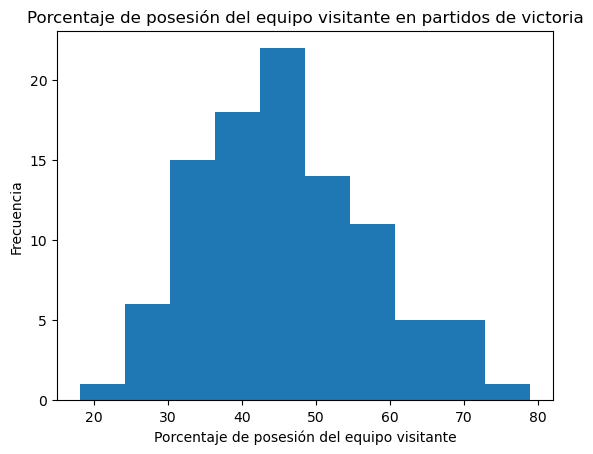

In [26]:
# Filtrar los partidos en los que el resultado es una victoria del equipo visitante
victorias_visitante = partidos2022[partidos2022['resultado'] == 'V']

# Obtener los porcentajes de posesión del equipo visitante en los partidos de victoria
posesion_visitante_victoria = victorias_visitante['posesion_visitante']

# Graficar los porcentajes de posesión del equipo visitante en los partidos de victoria
plt.hist(posesion_visitante_victoria)
plt.xlabel('Porcentaje de posesión del equipo visitante')
plt.ylabel('Frecuencia')
plt.title('Porcentaje de posesión del equipo visitante en partidos de victoria')
plt.show()

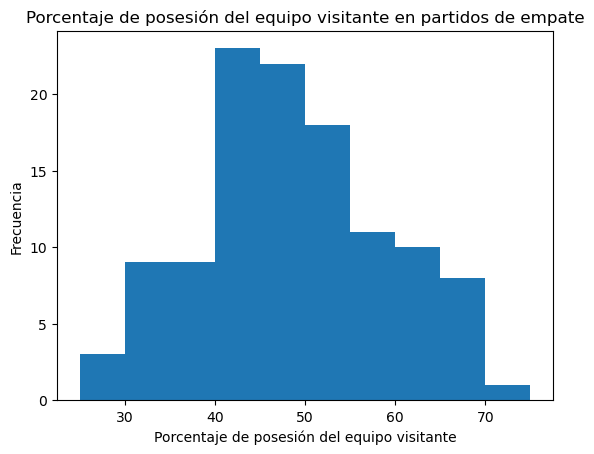

In [27]:
# Filtrar los partidos en los que el resultado es una victoria del equipo visitante
empates_visitante = partidos2022[partidos2022['resultado'] == 'E']

# Obtener los porcentajes de posesión del equipo visitante en los partidos de victoria
posesion_empates_victoria = empates_visitante['posesion_visitante']

# Graficar los porcentajes de posesión del equipo visitante en los partidos de victoria
plt.hist(posesion_empates_victoria)
plt.xlabel('Porcentaje de posesión del equipo visitante')
plt.ylabel('Frecuencia')
plt.title('Porcentaje de posesión del equipo visitante en partidos de empate')
plt.show()

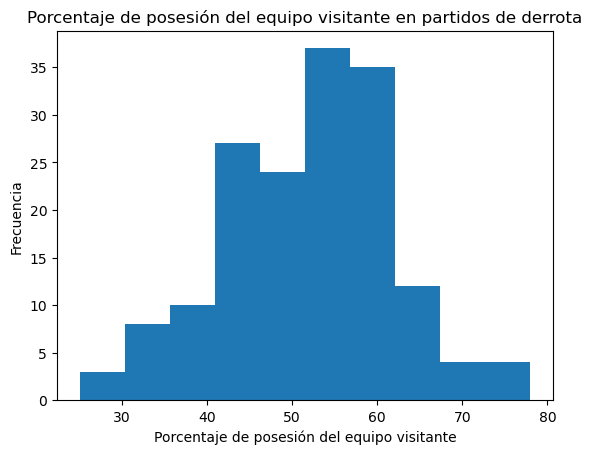

In [28]:
# Filtrar los partidos en los que el resultado es una victoria del equipo visitante
derrotas_visitante = partidos2022[partidos2022['resultado'] == 'L']

# Obtener los porcentajes de posesión del equipo visitante en los partidos de victoria
posesion_derrotas_victoria = derrotas_visitante['posesion_visitante']

# Graficar los porcentajes de posesión del equipo visitante en los partidos de victoria
plt.hist(posesion_derrotas_victoria)
plt.xlabel('Porcentaje de posesión del equipo visitante')
plt.ylabel('Frecuencia')
plt.title('Porcentaje de posesión del equipo visitante en partidos de derrota')
plt.show()

Al analizar las gráficas, se puede observar la ausencia de una correlación clara entre la posesión del equipo visitante y el resultado del partido. Esto pone en entredicho la suposición inicial de que una mayor posesión del balón se traduce en mayores probabilidades de anotar goles y ganar el encuentro. En el fútbol, se ha evidenciado que un equipo con menor posesión puede sacar provecho de oportunidades de contraataque, faltas o tiros de esquina para marcar goles y lograr la victoria, incluso permitiendo que el oponente tenga mayor control del balón.

En la gráfica que muestra las victorias, se esperaría encontrar una frecuencia más elevada de partidos con una posesión superior al 70%, de acuerdo con la hipótesis planteada. Sin embargo, se puede observar que la distribución se concentra en torno a la media y, de hecho, el pico se sitúa por debajo del 50%. Estos resultados nos llevan a concluir que no se evidencia una relación significativa entre la posesión del equipo visitante y el resultado final del partido.

De manera similar, en las otras dos gráficas también se observa una tendencia inesperada. En la gráfica de derrotas, se esperaría que la posesión del equipo visitante fuera baja, pero se identifican casos en los que el equipo visitante mantiene una posesión relativamente alta, a pesar de haber sufrido la derrota.

Estos hallazgos cuestionan la suposición generalizada de que la posesión del balón es un factor determinante en el resultado de un partido de fútbol. El juego real implica una interacción compleja entre diversos factores, como estrategias tácticas, efectividad en la finalización de jugadas y habilidad para defender de manera eficiente.

#### Realizaremos un análisis similar pero centrado en los tiros a puerta, ya que parece que este factor puede tener mayor relevancia que la posesión del balón. Exploraremos cómo la cantidad de tiros a puerta realizados por los equipos se relaciona con los resultados de los partidos y si existe alguna tendencia significativa

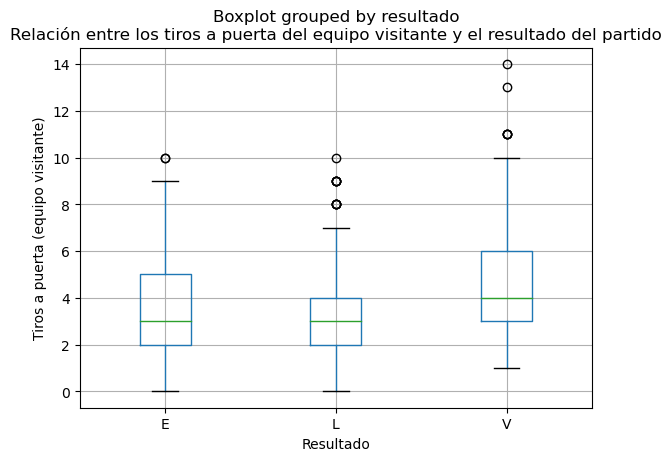

In [29]:
# Filtrar las columnas relevantes
data = df[['tiros_arco_visitante', 'resultado']]

# Eliminar filas con valores faltantes
data = data.dropna()

# Crear una figura y un eje
fig, ax = plt.subplots()

# Generar el boxplot
data.boxplot(column='tiros_arco_visitante', by='resultado', ax=ax)

# Etiquetas y título
ax.set_xlabel('Resultado')
ax.set_ylabel('Tiros a puerta (equipo visitante)')
ax.set_title('Relación entre los tiros a puerta del equipo visitante y el resultado del partido')

# Mostrar la gráfica
plt.show()

En el gráfico presentado, se puede apreciar una relación entre los tiros a puerta del equipo visitante y el resultado del partido. Se observa que el tercer cuartil de los datos correspondientes a las victorias es más elevado en comparación con las demás categorías, lo que indica que cuando el equipo visitante gana, se tiende a realizar un mayor número de tiros a puerta. Además, se identifican varios picos en los que se registraron una cantidad significativa de tiros a puerta, alcanzando valores de 14, 12 y 11 tiros, lo cual no es frecuente en el fútbol.

Asimismo, se evidencia que en los partidos en los que el equipo visitante resulta derrotado, se realizan menos tiros a puerta, llegando incluso a registrar cero intentos en algunas ocasiones. Esta observación resulta coherente, ya que al realizar menos tiros a puerta, las posibilidades de marcar un gol y obtener la victoria se reducen.

Un mayor número de tiros a puerta aumenta las probabilidades de obtener una victoria, mientras que una menor cantidad de tiros se asocia con mayores posibilidades de derrota.


#### Como el resultado basado en el equipo visitante no proporciona suficiente información, vamos a analizar el resultado del partido utilizando los datos de las casas de apuestas. El dataset incluye las apuestas ofrecidas para cada partido, por lo que utilizaremos esta información para nuestro análisis.

Si las casas de apuestas ofrecen una menor cuota de apuesta para la victoria del equipo local, esto indica que consideran que existe una mayor probabilidad de que el equipo local salga ganador en el partido.

In [30]:
# Comparar las tres apuestas y crear una nueva columna
df['Ganador_Casas_de_Apuestas'] = ''
df.loc[df['apuesta_local'] <= df[['apuesta_visitante', 'apuesta_empate']].min(axis=1), 'Ganador_Casas_de_Apuestas'] = 'Gana Local'
df.loc[df['apuesta_visitante'] < df[['apuesta_local', 'apuesta_empate']].min(axis=1), 'Ganador_Casas_de_Apuestas'] = 'Gana Visitante'
df.loc[df['apuesta_empate'] < df[['apuesta_local', 'apuesta_visitante']].min(axis=1), 'Ganador_Casas_de_Apuestas'] = 'Empate'

# Mostrar el resultado
df.head(20)

,torneo,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,...,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate,Ganador_Casas_de_Apuestas
1279,Campeonato 2017/18,10,14,Godoy Cruz,Lanus,4,1,41.0,7.0,15.0,...,51.100,1.806122,26.081633,0.265306,L,2018-02-07 21:30:00,1.87,4.43,3.24,Gana Local
1293,Campeonato 2017/18,11,14,Independiente,Rosario Central,1,1,61.0,10.0,25.0,...,33.525,1.790227,25.177778,0.311111,E,2018-01-24 21:10:00,1.98,4.08,3.14,Gana Local
1308,Campeonato 2017/18,13,1,Godoy Cruz,Chacarita,1,0,46.0,2.0,9.0,...,7.950,1.769412,24.368421,0.210526,L,2018-01-26 19:00:00,1.76,4.88,3.42,Gana Local
1309,Campeonato 2017/18,13,2,Tigre,Banfield,1,2,65.0,3.0,15.0,...,21.225,1.793750,24.375000,0.175000,V,2018-01-26 19:00:00,2.36,3.18,3.08,Gana Local
1310,Campeonato 2017/18,13,3,Talleres (C),San Lorenzo,2,0,54.0,5.0,11.0,...,49.825,1.783778,25.888889,0.288889,L,2018-01-26 21:15:00,2.16,3.58,3.06,Gana Local
1311,Campeonato 2017/18,13,4,Lanus,Patronato,1,1,64.0,3.0,4.0,...,11.775,1.793953,27.674419,0.139535,E,2018-01-27 19:15:00,1.74,5.13,3.36,Gana Local
1312,Campeonato 2017/18,13,5,Newells,Arsenal,2,1,57.0,7.0,18.0,...,9.050,1.775556,24.146341,0.341463,L,2018-01-27 17:00:00,1.82,4.54,3.33,Gana Local
1313,Campeonato 2017/18,13,6,Def y Justicia,Velez,0,1,57.0,7.0,15.0,...,50.825,1.781667,24.214286,0.261905,V,2018-01-27 17:00:00,2.02,3.89,3.14,Gana Local
1314,Campeonato 2017/18,13,7,Boca Juniors,Colon,2,0,51.0,6.0,12.0,...,37.300,1.793714,26.628571,0.228571,L,2018-01-27 21:30:00,1.46,7.31,4.06,Gana Local
1315,Campeonato 2017/18,13,8,Argentinos,San Martin (SJ),2,0,70.0,7.0,17.0,...,17.200,1.771136,25.893617,0.297872,L,2018-01-28 17:00:00,1.76,4.90,3.37,Gana Local


In [31]:
# Calcular el porcentaje de aciertos
aciertos = df[(df['resultado'] == 'V') & (df['Ganador_Casas_de_Apuestas'] == 'Gana Visitante') |
              (df['resultado'] == 'L') & (df['Ganador_Casas_de_Apuestas'] == 'Gana Local') |
              (df['resultado'] == 'E') & (df['Ganador_Casas_de_Apuestas'] == 'Empate')]
porcentaje_aciertos = len(aciertos) / len(df) * 100

# Mostrar el porcentaje de aciertos
print(f"Porcentaje de aciertos de las casas de apuestas: {porcentaje_aciertos:.2f}%")

Porcentaje de aciertos de las casas de apuestas: 46.62%


Basándonos en el análisis realizado, se observa que el porcentaje de acierto de las casas de apuestas es muy bajo. Esto nos lleva a la conclusión de que no es una estrategia confiable apostar simplemente siguiendo las indicaciones proporcionadas por las casas de apuestas.

Al comparar los resultados de los partidos registrados en la columna "resultado" con la nueva columna que creamos, que indica si la apuesta más baja corresponde a "Gana Local", "Gana Visitante" o "Empate", encontramos que el número de aciertos es reducido.

Esto implica que las casas de apuestas no son una fuente confiable para predecir los resultados de los partidos.

# Técnica 1: PCA (Análisis de Componentes Principales)

### Sacamos solo los partidos disputados en 2022

In [32]:
df = pd.read_csv('./afa_2015_2022_spa.csv')
df = df.dropna()

# Convierte la columna 'fecha_encuentro' en tipo datetime
df['fecha_encuentro'] = pd.to_datetime(df['fecha_encuentro'])

# Filtra los partidos entre 2020 y 2022
partidos2022 = df[(df['fecha_encuentro'].dt.year >= 2022) & (df['fecha_encuentro'].dt.year <= 2022)]

df = partidos2022[['equipo_local', 'equipo_visitante', 'altura_media_local', 'altura_media_visitante', 'posesion_local', 'posesion_visitante', 'resultado']]
df.head(20)

,equipo_local,equipo_visitante,altura_media_local,altura_media_visitante,posesion_local,posesion_visitante,resultado
2444,Barracas Central,Central Cba (SdE),1.788788,1.788378,45.0,55.0,E
2445,Atl Tucuman,Colon,1.803056,1.804737,52.0,48.0,E
2446,San Lorenzo,Independiente,1.789250,1.767073,46.0,54.0,E
2447,Banfield,Newells,1.793846,1.801316,59.0,41.0,V
2448,Patronato,Velez,1.787143,1.804872,39.0,61.0,E
2449,Platense,Godoy Cruz,1.786667,1.801026,51.0,49.0,L
2450,Racing Club,Huracan,1.773902,1.781860,62.0,38.0,L
2451,Talleres (C),Sarmiento (J),1.786429,1.813824,58.0,42.0,L
2452,Union,Tigre,1.811818,1.794828,52.0,48.0,V
2453,Estudiantes (LP),Gimnasia (LP),1.805833,1.786471,52.0,48.0,E


### Quitamos las columnas que no nos hacen falta, y sacamos la matriz de correlaciones

In [33]:
features = df.drop(['equipo_local', 'equipo_visitante','resultado' ], axis=1)
matriz_correlaciones = df.corr()
matriz_correlaciones

,altura_media_local,altura_media_visitante,posesion_local,posesion_visitante
altura_media_local,1.000000,-0.040128,-0.090051,0.090051
altura_media_visitante,-0.040128,1.000000,0.289511,-0.289511
posesion_local,-0.090051,0.289511,1.000000,-1.000000
posesion_visitante,0.090051,-0.289511,-1.000000,1.000000


### Sacamos los autovalores y autovectores para poder aplicar PCA

In [34]:
autovalores, autovectores = np.linalg.eig(matriz_correlaciones)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
minmax_scaler = MinMaxScaler()
normalized_features = minmax_scaler.fit_transform(scaled_features)

partidosE = pd.DataFrame(normalized_features, columns=features.columns)
#partidosE['equipo_local'] = df['equipo_local']
#partidosE['equipo_visitante'] = df['equipo_visitante']
#partidosE['resultado'] = df['resultado']
partidosE.head(20) # dataset normalizado 

,altura_media_local,altura_media_visitante,posesion_local,posesion_visitante
0,0.464482,0.455723,0.393443,0.606557
1,0.769671,0.805634,0.508197,0.491803
2,0.474367,0.000000,0.409836,0.590164
3,0.572680,0.732457,0.622951,0.377049
4,0.429295,0.808521,0.295082,0.704918
5,0.419109,0.726250,0.491803,0.508197
6,0.146079,0.316303,0.672131,0.327869
7,0.414016,1.000000,0.606557,0.393443
8,0.957105,0.593673,0.508197,0.491803
9,0.829088,0.414915,0.508197,0.491803


### Obtenemos la matriz de covaciarnaza

In [35]:
covariance_matrix = partidosE.cov()
covariance_matrix

,altura_media_local,altura_media_visitante,posesion_local,posesion_visitante
altura_media_local,0.069396,-0.002781,-0.004192,0.004192
altura_media_visitante,-0.002781,0.069187,0.013457,-0.013457
posesion_local,-0.004192,0.013457,0.031229,-0.031229
posesion_visitante,0.004192,-0.013457,-0.031229,0.031229


In [36]:
# Ordenamos los autovalores
sorted_idx = np.argsort(autovalores)[::-1]
sorted_eigenvalues = autovalores[sorted_idx]

In [37]:
explained_variance_ratio = sorted_eigenvalues / sum(sorted_eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [38]:
mvarianza = pd.DataFrame({'Componente': range(1, len(autovalores)+1),
                            'Porcentaje de Varianza': explained_variance_ratio*100,
                            'Porcentaje Acumulado de Varianza': cumulative_variance_ratio*100})

In [39]:
mvarianza

,Componente,Porcentaje de Varianza,Porcentaje Acumulado de Varianza
0,1,54.039308,54.039308
1,2,24.621628,78.660937
2,3,21.339063,100.000000
3,4,0.000000,100.000000


Este análisis nos proporciona información sobre la cantidad de información contenida en cada componente del dataset. El porcentaje acumulado de varianza nos indica la cantidad total de información que tenemos. Por ejemplo, si solo utilizamos 1 componente, tendremos el 54.04% de la información total disponible. Si empleamos 2 componentes, el porcentaje acumulado de varianza aumenta a 78.86%.

El porcentaje de varianza individual de cada componente nos muestra la cantidad de información que aporta cada una de ellas. En este caso, la componente 3 contribuye con el 21.33% del total de información, mientras que la componente 2 aporta el 24.62%.

In [40]:
# imprimimos cada autovalor con su componente para saber que componentes influyen mas
for i, autovalor in enumerate (autovalores):
    print(f"El autovalor {autovalor} corresponde a la componente {i+1}")

El autovalor 2.1615723390803936 corresponde a la componente 1
El autovalor 0.9848651212269983 corresponde a la componente 2
El autovalor 0.8535625396926076 corresponde a la componente 3
El autovalor 0.0 corresponde a la componente 4


### Mostramos los datos de las dos componentes que mas influyen

In [41]:
new_dataset = np.concatenate((autovectores[:,0].reshape(-1,1), autovectores[:,1].reshape(-1,1)), axis=1)

# Convertir el array en una lista y seleccionar las dos primeras columnas de cada fila
new_list = [row[:2] for row in autovectores.tolist()]

# Crear el nuevo dataset
autovectoresComponentes = pd.DataFrame(new_list, columns=['Componente 1', 'Componente 2'])

autovectoresComponentes["Atributos"] = ""
autovectoresComponentes.loc[0, "Atributos"] = "Altura Media Local"
autovectoresComponentes.loc[1, "Atributos"] = "Altura Media Visitante"
autovectoresComponentes.loc[2, "Atributos"] = "Posesion Local"
autovectoresComponentes.loc[3, "Atributos"] = "Posesion Visitante"

autovectoresComponentes

,Componente 1,Componente 2,Atributos
0,0.114120,-0.992739,Altura Media Local
1,-0.333765,-0.074360,Altura Media Visitante
2,-0.661656,-0.066857,Posesion Local
3,0.661656,0.066857,Posesion Visitante


### Para obtener únicamente dos componentes, aplicamos el algoritmo PCA utilizando la biblioteca correspondiente para reducir la dimensionalidad del conjunto de datos a dos componentes principales.

In [42]:
df = pd.read_csv('./afa_2015_2022_spa.csv')
df = df.dropna()

# Convierte la columna 'fecha_encuentro' en tipo datetime
df['fecha_encuentro'] = pd.to_datetime(df['fecha_encuentro'])

# Filtra los partidos entre 2020 y 2022
partidos2022 = df[(df['fecha_encuentro'].dt.year >= 2022) & (df['fecha_encuentro'].dt.year <= 2022)]

df = partidos2022[['altura_media_local', 'altura_media_visitante', 'posesion_local', 'posesion_visitante']]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Crear una instancia del objeto PCA
pca = PCA(n_components=2)  # Especifica el número de componentes principales que deseas obtener

# Ajustar el modelo PCA a los datos escalados
pca.fit(scaled_data)

# Obtener los componentes principales y la varianza explicada
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Transformar los datos originales en el espacio de los componentes principales
transformed_data = pca.transform(scaled_data)

# Crear un nuevo DataFrame con los datos transformados
df_pca = pd.DataFrame(data=transformed_data, columns=['Componente 1', 'Componente 2'])
df_pca.head(10)

,Componente 1,Componente 2
0,-0.780790,0.322649
1,0.391880,-1.014985
2,-1.241194,0.401931
3,1.244815,-0.337865
4,-1.054802,0.430086
5,0.320161,0.342762
6,1.269874,1.352464
7,1.530657,0.197543
8,0.041257,-1.662273
9,-0.130340,-1.128595


In [43]:
# Imprimir los resultados
print("Componentes principales:")
print(np.array2string(components, precision=2, separator=', '))

Componentes principales:
[[-0.11,  0.33,  0.66, -0.66],
 [-0.99, -0.07, -0.07,  0.07]]


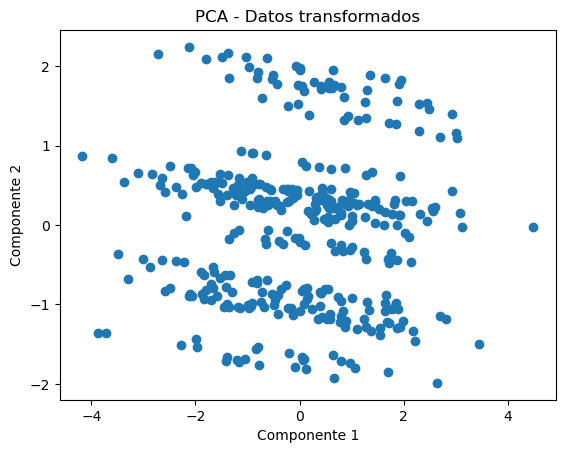

In [44]:
# Graficar los datos transformados en el espacio de los componentes principales
plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA - Datos transformados')
plt.show()

En esta gráfica PCA se puede observar que la distribución de los valores muestra una concentración uniforme en el centro, creando un cúmulo de puntos. Este patrón sugiere que no existe una relación clara o una estructura definida entre las variables analizadas.

La uniformidad en la ubicación de los puntos indica que las variables originales no están ejerciendo una influencia significativa en la variabilidad de los datos. Por lo tanto, se podría concluir que no hay una relación destacada entre estas variables, y su contribución a la comprensión de los patrones o tendencias en los datos es limitada.

### Graficamos estas dos componentes 

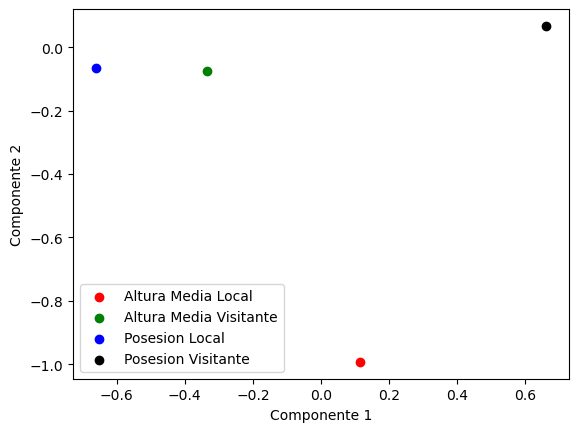

In [45]:
# Definir los colores para cada atributo
colors = {'Altura Media Local': 'red', 'Altura Media Visitante': 'green', 'Posesion Local': 'blue', 'Posesion Visitante': 'black'}

# Hacer el scatterplot
fig, ax = plt.subplots()
for atributo in autovectoresComponentes['Atributos'].unique():
    x = autovectoresComponentes[autovectoresComponentes['Atributos'] == atributo]['Componente 1']
    y = autovectoresComponentes[autovectoresComponentes['Atributos'] == atributo]['Componente 2']
    ax.scatter(x, y, c=colors[atributo], label=atributo)

# Configurar el gráfico
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.legend()
plt.show()

En la gráfica se observa que la altura media del equipo local y la altura media del equipo visitante no muestran una relación clara entre sí. Sin embargo, se puede apreciar una relación inversamente proporcional entre las posesiones del equipo local y del equipo visitante. En otras palabras, cuando el equipo local tiene mayor posesión del balón, el equipo visitante tiende a tener menor posesión, y viceversa.

# Técnica 2: Clasificador KNN

In [46]:
df = pd.read_csv('./afa_2015_2022_spa.csv')
df = df.dropna()

# Convierte la columna 'fecha_encuentro' en tipo datetime
df['fecha_encuentro'] = pd.to_datetime(df['fecha_encuentro'])

# Filtra los partidos entre 2020 y 2022
partidos2022 = df[(df['fecha_encuentro'].dt.year >= 2022) & (df['fecha_encuentro'].dt.year <= 2022)]

df = partidos2022[['posesion_local', 'posesion_visitante', 'edad_media_local', 'edad_media_visitante', 'tiros_arco_local', 'tiros_arco_visitante', 'resultado']]
df



,posesion_local,posesion_visitante,edad_media_local,edad_media_visitante,tiros_arco_local,tiros_arco_visitante,resultado
2444,45.0,55.0,26.473684,26.066667,5.0,6.0,E
2445,52.0,48.0,26.025641,25.520833,4.0,3.0,E
2446,46.0,54.0,24.523810,24.644444,3.0,4.0,E
2447,59.0,41.0,25.761905,22.923077,3.0,3.0,V
2448,39.0,61.0,25.692308,24.162791,7.0,5.0,E
...,...,...,...,...,...,...,...
2816,48.0,52.0,25.692308,24.866667,2.0,5.0,L
2817,55.0,45.0,26.473684,22.923077,4.0,3.0,E
2818,62.0,38.0,24.981481,25.520833,4.0,3.0,E
2819,62.0,38.0,24.090909,24.805556,12.0,6.0,V


In [47]:
# Eliminar filas con datos faltantes
df = df.dropna() # Elimina filas con datos faltantes
df = df.drop_duplicates() # Elimina filas duplicadas

# Convertir columna "Medal" en variable ordinal
df["resultado"] = df["resultado"].map({"L": 1, "E":2, "V":3}) # Mapea los resultados a valores numéricos
df

,posesion_local,posesion_visitante,edad_media_local,edad_media_visitante,tiros_arco_local,tiros_arco_visitante,resultado
2444,45.0,55.0,26.473684,26.066667,5.0,6.0,2
2445,52.0,48.0,26.025641,25.520833,4.0,3.0,2
2446,46.0,54.0,24.523810,24.644444,3.0,4.0,2
2447,59.0,41.0,25.761905,22.923077,3.0,3.0,3
2448,39.0,61.0,25.692308,24.162791,7.0,5.0,2
...,...,...,...,...,...,...,...
2816,48.0,52.0,25.692308,24.866667,2.0,5.0,1
2817,55.0,45.0,26.473684,22.923077,4.0,3.0,2
2818,62.0,38.0,24.981481,25.520833,4.0,3.0,2
2819,62.0,38.0,24.090909,24.805556,12.0,6.0,3


### Normalizamos los valores

In [48]:
# Aplicar normalización a características numéricas
scaler = StandardScaler()
df[["posesion_local","posesion_visitante", "edad_media_local", "edad_media_visitante", "tiros_arco_local", "tiros_arco_visitante"]] = scaler.fit_transform(df[["posesion_local","posesion_visitante", "edad_media_local", "edad_media_visitante", "tiros_arco_local", "tiros_arco_visitante"]])
df

,posesion_local,posesion_visitante,edad_media_local,edad_media_visitante,tiros_arco_local,tiros_arco_visitante,resultado
2444,-0.538073,0.538073,1.564801,1.161460,0.216061,1.232078,2
2445,0.112160,-0.112160,1.127731,0.632683,-0.227867,-0.267150,2
2446,-0.445183,0.445183,-0.337321,-0.216321,-0.671795,0.232593,2
2447,0.762394,-0.762394,0.870453,-1.883898,-0.671795,-0.267150,3
2448,-1.095416,1.095416,0.802560,-0.682923,1.103916,0.732335,2
...,...,...,...,...,...,...,...
2816,-0.259402,0.259402,0.802560,-0.001042,-1.115723,0.732335,1
2817,0.390832,-0.390832,1.564801,-1.883898,-0.227867,-0.267150,2
2818,1.041065,-1.041065,0.109142,0.632683,-0.227867,-0.267150,2
2819,1.041065,-1.041065,-0.759620,-0.060244,3.323555,1.232078,3


### Hacemos dos conjuntos de datos, uno para entrenar y otro para validar

In [49]:
# Separar set de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(df.drop(["resultado"], axis=1), df["resultado"], test_size=0.2, random_state=42)
X_train

,posesion_local,posesion_visitante,edad_media_local,edad_media_visitante,tiros_arco_local,tiros_arco_visitante
2554,0.669503,-0.669503,-0.689499,1.581252,0.659988,-0.267150
2664,1.877079,-1.877079,-1.272438,1.121716,-0.227867,0.732335
2795,0.576613,-0.576613,-1.070010,0.798799,-0.671795,-0.267150
2640,0.019270,-0.019270,-0.002861,-1.883898,-0.227867,0.232593
2520,-1.281197,1.281197,-0.848303,-0.882747,1.103916,-0.267150
...,...,...,...,...,...,...
2516,-0.166511,0.166511,-0.759620,-1.474042,1.547844,-0.766892
2551,-1.095416,1.095416,-1.070010,-0.882747,1.103916,-1.266634
2715,0.112160,-0.112160,-1.486137,0.632683,-0.671795,0.232593
2793,-0.166511,0.166511,-0.308659,-1.474042,-0.671795,2.731305


#### Probamos con distintas configuraciones para ver cuál es la mejor

In [50]:
import warnings
warnings.filterwarnings("ignore")

# Probar distintas configuraciones de vecinos y distancia
for k in [5, 7, 9]:
    for distance in ["euclidean", "manhattan"]:
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
        scores = cross_val_score(knn, X_train, y_train, cv=5)
        print(f"k={k}, distancia = {distance}: precisión promedio {scores.mean()}")

k=5, distancia = euclidean: precisión promedio 0.4833333333333334
k=5, distancia = manhattan: precisión promedio 0.4666666666666667
k=7, distancia = euclidean: precisión promedio 0.5033333333333333
k=7, distancia = manhattan: precisión promedio 0.49000000000000005
k=9, distancia = euclidean: precisión promedio 0.5199999999999999
k=9, distancia = manhattan: precisión promedio 0.4833333333333333


Después de experimentar con diferentes valores de k y distintas métricas de distancia, hemos analizado los resultados y concluido que la mejor configuración para nuestro clasificador KNeighborsClassifier es utilizar un valor de k igual a 5 y la distancia de Manhattan. Esta conclusión se basa en la precisión obtenida durante la evaluación del modelo.

In [51]:
# Elegir la mejor configuración
knn = KNeighborsClassifier(n_neighbors=9, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [52]:
# Predecir resultados
partidos = [
    {"posesion_local": 30, "posesion_visitante": 70, "edad_media_local": 22, "edad_media_visitante": 29, "tiros_arco_local": 1, "tiros_arco_visitante": 10},
    {"posesion_local": 90, "posesion_visitante": 10, "edad_media_local": 24, "edad_media_visitante": 34, "tiros_arco_local": 13, "tiros_arco_visitante": 2},
]

#### Aplicamos el clasificador a cada partido

In [53]:

for partido in partidos:
    # Transformar los datos del atleta utilizando el escalador previamente ajustado
    X = scaler.transform(pd.DataFrame(partido, index=[0])[["posesion_local","posesion_visitante", "edad_media_local", "edad_media_visitante", "tiros_arco_local", "tiros_arco_visitante"]])
    
    # Realizar la predicción de probabilidades de medalla para el atleta utilizando el modelo KNN previamente ajustado
    prediction = knn.predict_proba(X)
    
    # Imprimir las probabilidades de medalla para el atleta
    print(f"Partido: Probabilidad de derrota del equipo vistante {prediction[0][0]:.2f}, probabilidad de empate {prediction[0][1]:.2f}, probabilidad de victoria del equipo visitante {prediction[0][2]:.2f}\n")

Partido: Probabilidad de derrota del equipo vistante 0.11, probabilidad de empate 0.33, probabilidad de victoria del equipo visitante 0.56

Partido: Probabilidad de derrota del equipo vistante 0.44, probabilidad de empate 0.33, probabilidad de victoria del equipo visitante 0.22



# Conclusión

La hipótesis inicial planteada consistía en conocer si la posesión del balón afecta al resultado de un partido de fútbol. A primera vista, podría parecer lógico pensar que sí, ya que tener en posesión durante más tiempo el balón aumentaría las posibilidades de marcar en la portería contraria (esto se debe a la dificultad para anotar sin tener el balón). Sin embargo, tras el análisis realizado, se ha concluido/determinado que esta hipótesis es incorrecta. 

Se ha podido confirmar que la posesión del balón no influye de manera significativa en el resultado de un partido, ya que un equipo puede marcar goles sin necesidad de tener el balón en posesión, aprovechándose, por ejemplo, de faltas o tiros de esquina. 

Posteriormente, se exploró la relación entre los tiros a puerta y el resultado del partido para determinar la posible existencia de tener mayor probabilidad de ganar cuando se realizan más tiros a puerta. Con estos estudios, se ha confirmado existencia de esta relación: en los partidos en los que el equipo visitante realiza más tiros a puerta, este tiene más probabilidades de salir victorioso, mientras que en los que se realizan menos tiros a puerta, el equipo visitante tiende a perder. Esto tiene una explicación lógica, ya que realizar más tiros a puerta, aumenta las posibilidades de marcar y asegurar la victoria. 

También se evaluó la fiabilidad de las casas de apuestas. Se comparó la predicción de los resultados según estas con los resultados reales de los partidos y se comprobó que la fiabilidad es baja. Por lo tanto, no se recomienda tomar las decisiones a la hora de realizar apuestas basándose, exclusivamente, en la información proporcionada por estos centros. 

En el análisis realizado, se aplicaron dos técnicas de Data Mining: PCA y KNN. 

El PCA (Análisis de Componentes Principales) permitió examinar la influencia de las variables en el dataset, y confirmó que la posesión del balón no tiene un impacto significativo en los resultados, respaldando así las conclusiones. 

Por otro lado, el algoritmo de clasificación KNN (K Vecinos Más Cercanos) para clasificar nuevos partidos ficticios, proporcionando probabilidades de victoria, derrota o empate para el equipo visitante. Esta técnica nos permite realizar predicciones basadas en patrones identificados en los datos previos.